In [1]:
import sys
from pathlib import Path


sys.path.append(str(Path('../../../code/myModels').resolve()))

from dbscan import MyDBSCAN

In [ ]:
import pandas as pd
import numpy as np
import os

merged_dir = "../../../data/merged"
train_file_path = os.path.join(merged_dir, "train_data.parquet")
train_data = pd.read_parquet(train_file_path)

features = [c for c in train_data.columns if c not in ['fire','longitude', 'latitude']]
X = train_data[features].to_numpy() 
y = train_data['fire'].to_numpy()

In [3]:
# Define param grid
eps_values = [3, 5, 7]
min_samples_values = [3, 5, 10]
param_grid = [(e, m) for e in eps_values for m in min_samples_values]

In [4]:
# DBSCAN on ALL data
print("DBSCAN on all data")
dbscan_all = MyDBSCAN(verbose=True)
results_all = dbscan_all.evaluate_param_grid(X, param_grid, plot=False)

DBSCAN on all data
eps=3, min_samples=3 → clusters=59, silhouette=0.0364
eps=3, min_samples=5 → clusters=51, silhouette=0.0482
eps=3, min_samples=10 → clusters=44, silhouette=0.0489
eps=5, min_samples=3 → clusters=20, silhouette=0.3314
eps=5, min_samples=5 → clusters=18, silhouette=0.4313
eps=5, min_samples=10 → clusters=17, silhouette=0.4338
eps=7, min_samples=3 → clusters=3, silhouette=0.5178
eps=7, min_samples=5 → clusters=3, silhouette=0.5178
eps=7, min_samples=10 → clusters=3, silhouette=0.5178

 eps | min_samples | n_clusters | Silhouette
-----|-------------|------------|-----------
3.00 |           3 |         59 | 0.03641859216143007
3.00 |           5 |         51 | 0.048202808208151954
3.00 |          10 |         44 | 0.048869408066207994
5.00 |           3 |         20 | 0.3313841664897155
5.00 |           5 |         18 | 0.43129265156158575
5.00 |          10 |         17 | 0.4338385912836863
7.00 |           3 |          3 | 0.5177545211428949
7.00 |           5 |       

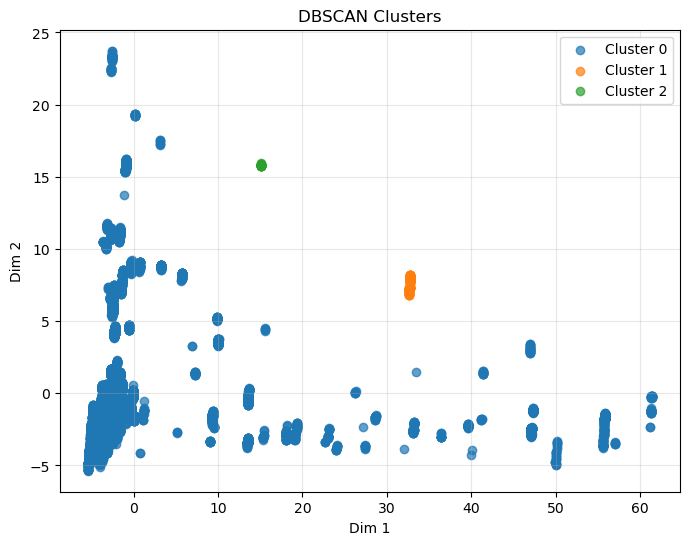

In [5]:
dbscan_all = MyDBSCAN( eps=7, min_samples=3,verbose=True)
dbscan_all.fit(X)
dbscan_all.plot_clusters(X)

In [6]:
# DBSCAN PER CLASS
unique_classes = np.unique(y)
per_class_results = {}

for label in unique_classes:
    print(f"\nDBSCAN for fire={label}")
    mask = (y == label)
    X_class = X[mask]
    dbscan_cls = MyDBSCAN(verbose=True)
    results_cls = dbscan_cls.evaluate_param_grid(X_class, param_grid, plot=False)
    per_class_results[label] = results_cls


DBSCAN for fire=0
eps=3, min_samples=3 → clusters=54, silhouette=0.0799
eps=3, min_samples=5 → clusters=51, silhouette=0.0831
eps=3, min_samples=10 → clusters=40, silhouette=0.1032
eps=5, min_samples=3 → clusters=19, silhouette=0.4322
eps=5, min_samples=5 → clusters=18, silhouette=0.4330
eps=5, min_samples=10 → clusters=16, silhouette=0.4358
eps=7, min_samples=3 → clusters=3, silhouette=0.5034
eps=7, min_samples=5 → clusters=3, silhouette=0.5034
eps=7, min_samples=10 → clusters=3, silhouette=0.5034

 eps | min_samples | n_clusters | Silhouette
-----|-------------|------------|-----------
3.00 |           3 |         54 | 0.07992183417935017
3.00 |           5 |         51 | 0.08309409391262915
3.00 |          10 |         40 | 0.10323245494703757
5.00 |           3 |         19 | 0.4322238978406618
5.00 |           5 |         18 | 0.4330199270529014
5.00 |          10 |         16 | 0.43581105018390137
7.00 |           3 |          3 | 0.5033950051440456
7.00 |           5 |         